### 09 - LLN and CLT

Statistics as defined by the American Statistical Association (ASA) “is the science of learning from data, and of measuring, controlling and communicating uncertainty". Inferencial Statistics is one of the two main branches of statistics. 
It uses a random sample of data taken from a population to describe and make inferences about the population. 
Inferential statistics or statistical inference builds upon two theorems:
- The Law of Large Numbers (The mean of a large sample is close to the mean of the distribution)
- The Central Limit Theorems (The sampling distribution of a sameple mean is approximately a normal distribution)

This notebook uses the data from College Scorecard to help illustrate these two fundamental theorems.


In [222]:
# Import useful Python libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statistics
from pylab import rcParams


In [223]:
# use college scorecard 2017-18 acedemic year data

column_list = ["INSTNM", "STABBR","CONTROL", "TUITIONFEE_IN"]
df = pd.read_csv("MERGED2017_18_PP.csv", usecols=column_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 4 columns):
INSTNM           7115 non-null object
STABBR           7115 non-null object
CONTROL          7115 non-null int64
TUITIONFEE_IN    4028 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 222.4+ KB


In [224]:
# Find out the existance of missing values

df.isna().sum()

INSTNM              0
STABBR              0
CONTROL             0
TUITIONFEE_IN    3087
dtype: int64

In [143]:
# Take a look at what colleges have missing tuition

df[df["TUITIONFEE_IN"].isna()].sample(20)

,INSTNM,STABBR,CONTROL,TUITIONFEE_IN
3254,Sherman College of Chiropractic,SC,2,NaN
4101,Raphael's School of Beauty Culture Inc-Brunswick,OH,3,NaN
7113,BCI - Malden,MA,2,NaN
3907,Educational Technical College-Recinto de Bayamon,PR,3,NaN
5894,International College of Beauty Arts & Sciences,CA,3,NaN
5808,The Salon Professional Academy-St Charles,MO,3,NaN
5615,Summit Salon Academy,IN,3,NaN
6894,Hebrew Union College-Jewish Institute of Relig...,OH,2,NaN
6097,Ross Medical Education Center-Dayton,OH,3,NaN
5566,Salon Success Academy-Redlands,CA,3,NaN


In [144]:
# Drop the colleges with missing tuition

df = df[df["TUITIONFEE_IN"].isna() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4028 entries, 0 to 7114
Data columns (total 4 columns):
INSTNM           4028 non-null object
STABBR           4028 non-null object
CONTROL          4028 non-null int64
TUITIONFEE_IN    4028 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 157.3+ KB


In [145]:
df.describe()

,CONTROL,TUITIONFEE_IN
count,4028.000000,4028.000000
mean,1.776812,15081.399950
std,0.754484,12723.724262
min,1.000000,0.000000
25%,1.000000,5246.250000
50%,2.000000,11296.000000
75%,2.000000,19400.000000
max,3.000000,74514.000000


In [137]:
# Since the min of tuition is 0, let's find out how many of them

df[df["TUITIONFEE_IN"] == 0 ].shape

(0, 4)

In [146]:
# Display the colleges with 0 tuition

df[df["TUITIONFEE_IN"] == 0 ]

,INSTNM,STABBR,CONTROL,TUITIONFEE_IN
577,United States Air Force Academy,CO,1,0.0
629,United States Coast Guard Academy,CT,1,0.0
1500,United States Naval Academy,MD,1,0.0
2449,United States Military Academy,NY,1,0.0


In [147]:
# Drop these colleges with 0 tuition

df = df[df["TUITIONFEE_IN"] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 7114
Data columns (total 4 columns):
INSTNM           4024 non-null object
STABBR           4024 non-null object
CONTROL          4024 non-null int64
TUITIONFEE_IN    4024 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 157.2+ KB


The control is used to classify the type of institution:
- 1 = "Public"
- 2 = "Private nonprofit"
- 3 = "Private for-profit"
We need to convert the varibale from int to string.

In [148]:
# Convert the varibale from int to string

df["CONTROL"] = df["CONTROL"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 7114
Data columns (total 4 columns):
INSTNM           4024 non-null object
STABBR           4024 non-null object
CONTROL          4024 non-null object
TUITIONFEE_IN    4024 non-null float64
dtypes: float64(1), object(3)
memory usage: 157.2+ KB


In [149]:
# Replace the numbers with the explicit names

control_dict = {"1": "Public",
                "2": "Private nonprofit",
                "3": "Private for-profit"}
df["CONTROL"] = df["CONTROL"].map(control_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 7114
Data columns (total 4 columns):
INSTNM           4024 non-null object
STABBR           4024 non-null object
CONTROL          4024 non-null object
TUITIONFEE_IN    4024 non-null float64
dtypes: float64(1), object(3)
memory usage: 157.2+ KB


In [152]:
df.sample(20)

,INSTNM,STABBR,CONTROL,TUITIONFEE_IN
3460,University of the Incarnate Word,TX,Private nonprofit,29990.0
4960,West Virginia Junior College-Bridgeport,WV,Private for-profit,12625.0
6405,Valor Christian College,OH,Private nonprofit,5160.0
7025,Strayer University-Lower Bucks County Campus,PA,Private for-profit,13857.0
7058,Strayer University-Willingboro Campus,NJ,Private for-profit,13857.0
5816,New York Film Academy,CA,Private for-profit,28260.0
2734,Mount Saint Joseph University,OH,Private nonprofit,29100.0
814,Carver Bible College,GA,Private nonprofit,12685.0
1895,Jefferson College,MO,Public,3300.0
3388,Vanderbilt University,TN,Private nonprofit,47664.0


In [151]:
df.describe(include="all")

,INSTNM,STABBR,CONTROL,TUITIONFEE_IN
count,4024,4024,4024,4024.000000
unique,3966,59,3,NaN
top,Stevens-Henager College,CA,Public,NaN
freq,7,316,1692,NaN
mean,NaN,NaN,NaN,15096.391402
std,NaN,NaN,NaN,12721.153785
min,NaN,NaN,NaN,480.000000
25%,NaN,NaN,NaN,5255.750000
50%,NaN,NaN,NaN,11315.000000
75%,NaN,NaN,NaN,19400.000000


In [13]:
# Make sure there is no missing value for the institution type
df["CONTROL"].isna().sum()

0

In [14]:
df.describe()

,TUITIONFEE_IN
count,4024.000000
mean,15096.391402
std,12721.153785
min,480.000000
25%,5255.750000
50%,11315.000000
75%,19400.000000
max,74514.000000


In [16]:
# find out the median tuition
# It appears that there is a large difference between the mean and the median
statistics.median(df["TUITIONFEE_IN"])

11315.0

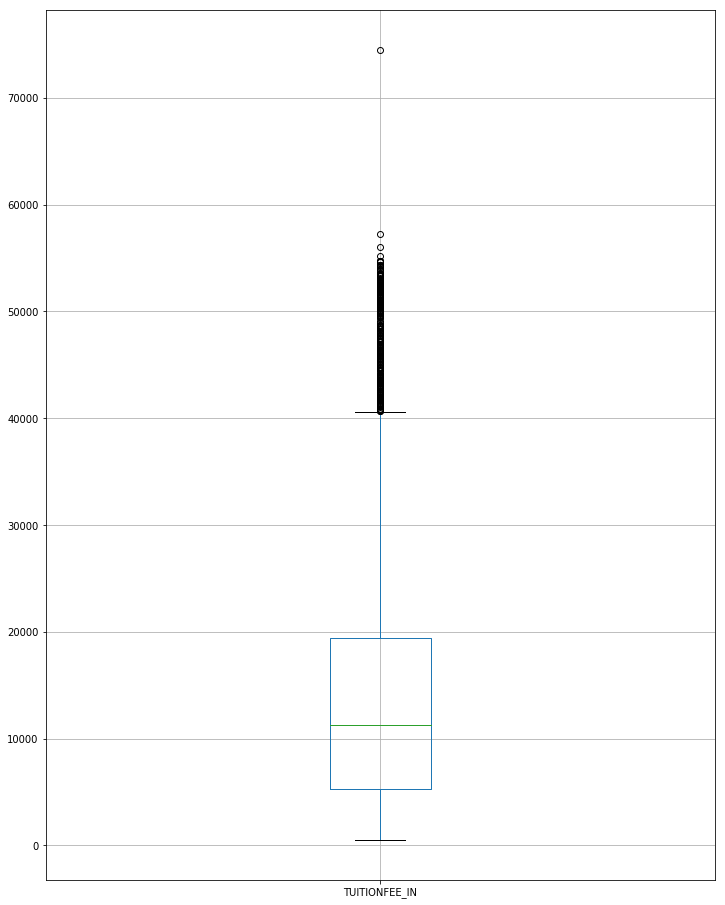

In [156]:
# Make a boxplot
# there are many outliers above the maximum point which explains why the mean is much larger than the median
# The outliers skewed the mean towards higher tuition

fig, ax = plt.subplots(figsize=(12,16))
df.boxplot(ax = ax)

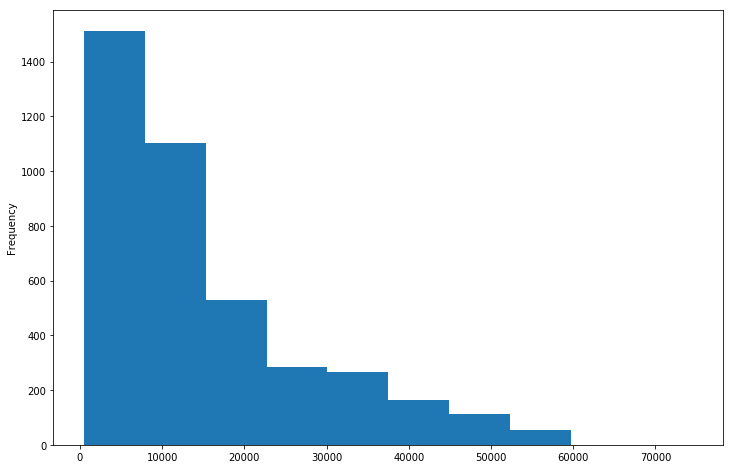

In [158]:
# MAke a histogram

fig, ax = plt.subplots(figsize=(12,8))
df["TUITIONFEE_IN"].plot.hist(ax=ax)

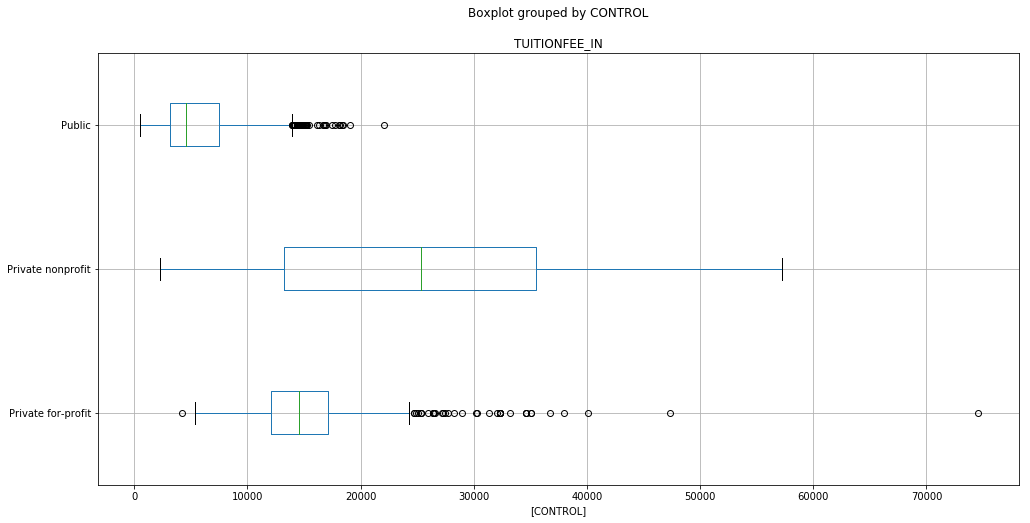

In [153]:
# Make boxplots, one for each type of institution
# IT makes sense public colleges have lowerest tuition
# However, private nonprofit colleges have higher tuition than for-profit colleges. A little counter-intuitive.

fig, ax = plt.subplots(figsize=(16,8))
df.boxplot(ax = ax,by = "CONTROL", vert=False)

Text(0.5, 0, 'Institution Type')

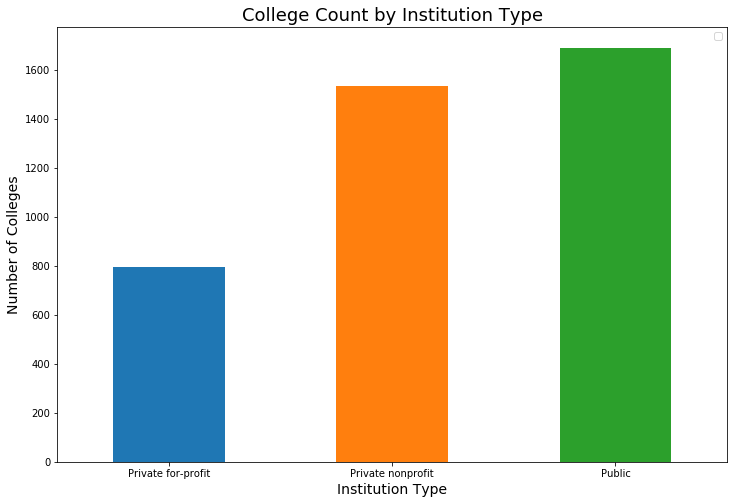

In [176]:
# Plot the count of colleges within each category

fig, ax = plt.subplots(figsize=(12,8))
df[["CONTROL"]].groupby(["CONTROL"]).size().plot.bar(ax=ax, rot=0)
ax.set_title("College Count by Institution Type", size=18)
ax.legend("")
ax.set_ylabel("Number of Colleges", size=14)
ax.set_xlabel("Institution Type",size=14)

#### Let's explore the law of large Numbers
LLN states that as a sample size grows, its mean gets closer to the average of the whole population.
We are going to start the sample size from 5 and increase by 10 each time until it reaches 2000
We calculate the sample means and make a line plot against the sample size.
We can see as the sample size increases, the sample means converge to the population mean shown by a horizontal line.

Text(0.5, 0, 'Sample Size')

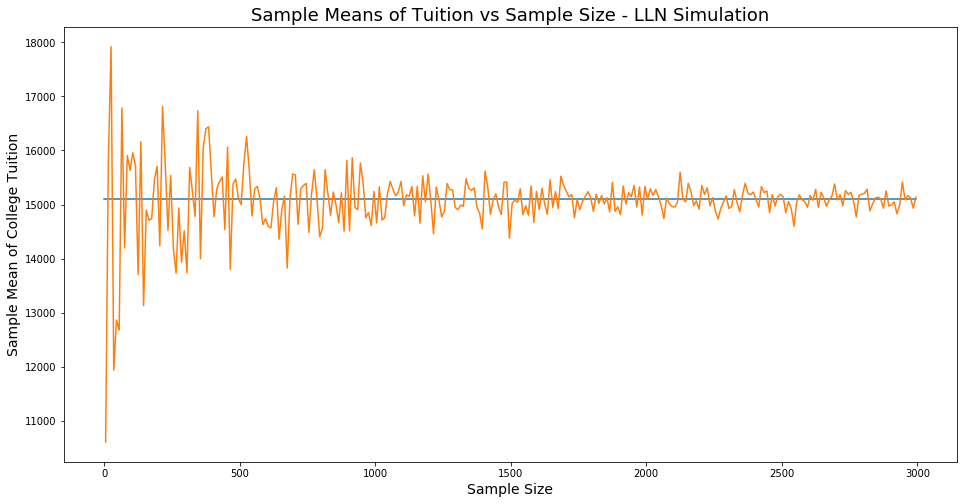

In [217]:
sample_means = []
sample_sizes = list(range(5,3000, 10))

for s in sample_sizes:
    sample_df = df["TUITIONFEE_IN"].sample(s)          # Generate a sample of size s from the population
    sample_means.append(sample_df.mean())              # append the sameple mean to the list
    
fig, ax = plt.subplots(figsize=(16,8))
#ax.set_xlim(0,sample_sizes[-1])                   # sample_sizes[-1] return the last item of the list
pop_mean = df["TUITIONFEE_IN"].mean()                  # calculate the population mean      
ax.plot((0,sample_sizes[-1]), (pop_mean, pop_mean))    # draw a horizontal line of the population mean 
ax.plot(sample_sizes, sample_means)                    # make a line plot of sample means (y-axis) along sample sizes (x-axis)
ax.set_title("Sample Means of Tuition vs Sample Size - LLN Simulation", size=18)
ax.set_ylabel("Sample Mean of College Tuition", size=14)
ax.set_xlabel("Sample Size", size=14)

#### Let's explore the Central Limit Theorm (CLT)

CLT states that the sampling distribution of the sample mean of any independent, random variable 
will be normal or nearly normal, if the sample size is large enough.
How large is "large enough"? The answer depends on two factors:
- Requirements for accuracy. The more closely the sampling distribution needs to resemble a normal distribution, the more sample points will be required.
- The shape of the underlying population. The more closely the original population resembles a normal distribution, the fewer sample points will be required.
In practice, some statisticians say that a sample size of 30 is large enough when the population distribution is roughly bell-shaped. Others recommend a sample size of at least 40. But if the original population is distinctly not normal (e.g., is badly skewed, has multiple peaks, and/or has outliers), researchers like the sample size to be even larger.

As can be seen from the resulting plot, as sample size increases, the sampling distribution becomes more normal and its mean converges to the population mean and its variance become smaller. This means as the sample size increases we have more confidence that the sample mean approximates the population mean. 

Text(0.5, 0, 'Sample Mean of College Tuition')

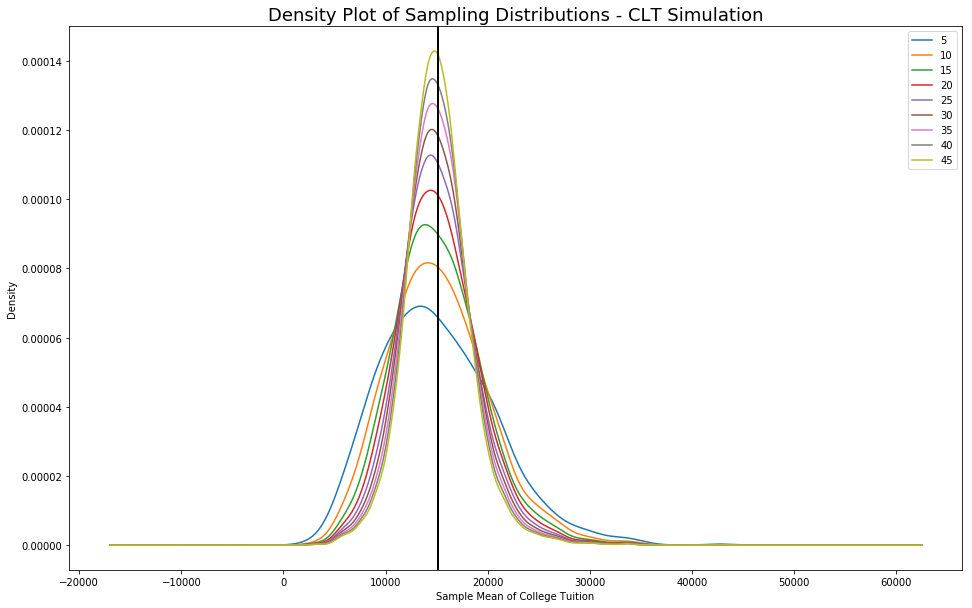

In [220]:
sample_means=[]
sample_sizes = range(5,50,5)
fig, ax = plt.subplots(figsize=(16,10))
#ax.set_xlim(df["TUITIONFEE_IN"].min(),df["TUITIONFEE_IN"].max() )
for s in sample_sizes:
    for i in range(1000):
        sample_df = df["TUITIONFEE_IN"].sample(s)
        sample_means.append(sample_df.mean())
    pd.DataFrame(sample_means).plot.density(ax=ax)
    ax.legend(sample_sizes)

ax.axvline(x=df["TUITIONFEE_IN"].mean(), linewidth=2, color="k")   # draw a vertical line of the population mean
ax.set_title("Density Plot of Sampling Distributions - CLT Simulation", size=18)
ax.set_xlabel("Sample Mean of College Tuition")

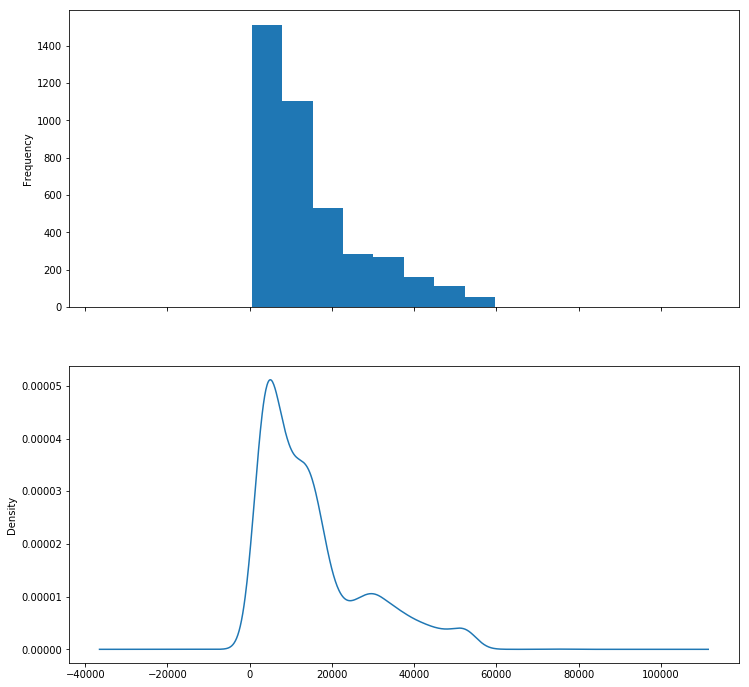

In [118]:
# Let's plot the histogram of tuitions to get a feel of the distribution
# Looks like it is nowhere near a normal distribution which has a bell-shaped curve
# But that does not matter much. What is important is that the sampling distribution of sample means is normal distribution

fig, ax = plt.subplots(2,sharex=True, figsize=(12,12))
ax[0].set_xlimit = (0, df["TUITIONFEE_IN"].max())
ax[1].set_xlimit = (0, df["TUITIONFEE_IN"].max())
df["TUITIONFEE_IN"].plot.hist(ax=ax[0])
df["TUITIONFEE_IN"].plot.density(ax=ax[1])

In [221]:
# The end